In [1]:
import numpy as np, pylab,sys
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit

%matplotlib inline  

In [2]:
def get_stats(log_mass,conc, bins):
    median_conc = np.empty(len(bins)-1)
    quar1_conc = np.empty(len(bins)-1)
    quar2_conc = np.empty(len(bins)-1)

    for i in range(len(bins)-1):
        mass_index = np.where((log_mass>bins[i]) & (log_mass<bins[i+1]))
        if(np.size(mass_index)>1):
            conc_index = conc[mass_index]
            print np.size(mass_index)
            median_conc[i] = np.percentile(conc_index, 50)
            quar1_conc[i] = np.percentile(conc_index, 25)
            quar2_conc[i] = np.percentile(conc_index, 75)
        else:
            median_conc[i] = median_conc[i-1]
            quar1_conc[i] = quar1_conc[i-1]
            quar2_conc[i] = quar2_conc[i-1]
                                      
    return median_conc,quar1_conc,quar2_conc

def enlarge_labels(ax,fsize):
    ticklabels_x = ax.get_xticklabels()
    ticklabels_y = ax.get_yticklabels()

    for label_x in ticklabels_x:
        label_x.set_fontsize(fsize)
        label_x.set_family('serif')
    for label_y in ticklabels_y:
        label_y.set_fontsize(fsize)
        label_y.set_family('serif')

# Downsampling statistics

In [3]:
sample_path = '/home/forero/github/MACH/data/results/BolshoiDownsample/'
dens_files = glob.glob(sample_path+"results_dens*.dat")
dens_files.sort()
mass_files = glob.glob(sample_path+"results_mass*.csv")
mass_files.sort()
vlct_files = glob.glob(sample_path+"results_vlct*.csv")
vlct_files.sort()

In [4]:
vlct_files

['/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_003438.csv',
 '/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_004497.csv',
 '/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_014976.csv',
 '/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_019876.csv',
 '/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_026975.csv',
 '/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_030491.csv',
 '/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_036320.csv',
 '/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_055806.csv',
 '/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_059095.csv',
 '/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_059875.csv',
 '/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_060662.csv',
 '/home/forero/github/MACH/data/results/BolshoiDownsample/results_vlct_06996

In [5]:

def gather_data(files_dens, files_vlct, files_mass):
    dens_conc = np.empty(0)
    vlct_conc = np.empty(0)
    mass_conc = np.empty(0)
    n_part = np.empty(0)
    r_vir = np.empty(0)
    for file_dens, file_vlct, file_mass in zip(files_dens, files_vlct, files_mass):
        dens_data = np.loadtxt(file_dens)
        vlct_data = np.loadtxt(file_vlct, skiprows=1, delimiter=',')
        mass_data = np.loadtxt(file_mass, skiprows=1, delimiter=',')
    
        norm_dens_conc = np.median(vlct_data[-100:,3]/dens_data[-100:,1])
        print norm_dens_conc
        dens_conc = np.append(dens_conc, vlct_data[:,3]/dens_data[:,1]/norm_dens_conc - 1.0)
        
        norm_vlct_conc = np.median(vlct_data[-100:,1])
        vlct_conc = np.append(vlct_conc, vlct_data[:,1]/norm_vlct_conc - 1.0)
        
        norm_mass_conc = np.median(mass_data[-100:,2])
        mass_conc = np.append(mass_conc, mass_data[:,2]/norm_mass_conc - 1.0)
        
        n_part = np.append(n_part, vlct_data[:,2])
        print(np.shape(vlct_conc))
    return dens_conc, vlct_conc, mass_conc, n_part 
        
dens_conc, vlct_conc, mass_conc, n_part = gather_data(dens_files, vlct_files, mass_files)

7.80580148872
(700,)
5.38874059398
(1400,)
6.70561655654
(2100,)
5.47086102638
(2800,)
5.80110794518
(3500,)
6.22215080239
(4200,)
6.13260648442
(4900,)
4.79231010517
(5600,)
5.92480579323
(6300,)
6.1076045838
(7000,)
5.71937330102
(7700,)
3.73029190703
(8400,)
6.12117006058
(9100,)
6.91534306541
(9800,)


In [6]:
def func(x, a, b):
    return a / (1.0 + x)**b 
    #return a * x ** b

n_int = 13
n_part_space = np.logspace(2.3,5.0,n_int)

median_dens_conc = np.zeros(n_int-1)
low_dens_conc = np.zeros(n_int-1)
high_dens_conc = np.zeros(n_int-1)


median_vlct_conc = np.zeros(n_int-1)
low_vlct_conc = np.zeros(n_int-1)
high_vlct_conc = np.zeros(n_int-1)

median_mass_conc = np.zeros(n_int-1)
low_mass_conc = np.zeros(n_int-1)
high_mass_conc = np.zeros(n_int-1)

n_part_int = 10**(0.5*(np.log10(n_part_space[0:-1]) + np.log10(n_part_space[1:])))

for i in range((n_int-1)):
    ii = (n_part > n_part_space[i]) & (n_part < n_part_space[i+1])
    
    median_dens_conc[i] = np.median(dens_conc[ii])
    median_mass_conc[i] = np.median(mass_conc[ii])
    median_vlct_conc[i] = np.median(vlct_conc[ii])
    
    low_dens_conc[i] = np.percentile(dens_conc[ii],14)
    high_dens_conc[i] = np.percentile(dens_conc[ii],86)
    low_vlct_conc[i] = np.percentile(vlct_conc[ii],14)
    high_vlct_conc[i] = np.percentile(vlct_conc[ii],86)
    low_mass_conc[i] = np.percentile(mass_conc[ii],14)
    high_mass_conc[i] = np.percentile(mass_conc[ii],86)

#n_part_int = n_


dens [ 5039.83769034     8.19332522] 4083.91798961 0.640003425433
vel [ 461.84125368    6.58200176] 326.408470253 0.550949442617
mass [-5.20573632  4.81609745] 9.06163054792 1.32553727013


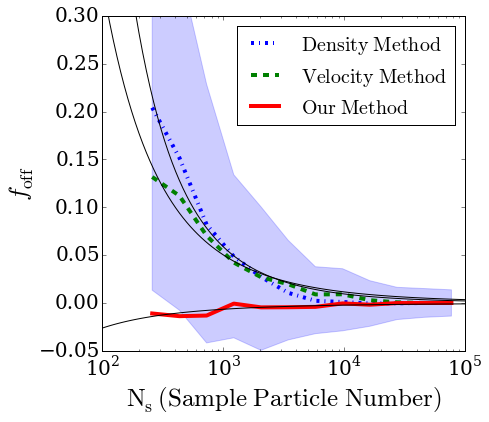

In [14]:
   
fig = plt.figure(figsize=(6.5,6.0))
ax = plt.axes()

enlarge_labels(ax,20)
plt.plot(n_part_int, median_dens_conc, label=r'$\mathrm{Density\ Method}$', linewidth=4, linestyle='-.')
plt.plot(n_part_int, median_vlct_conc, label=r'$\mathrm{Velocity\ Method}$', linewidth=4, linestyle='--')
plt.plot(n_part_int, median_mass_conc, label=r'$\mathrm{Our\ Method}$', linewidth=4, linestyle='-')
plt.fill_between(n_part_int, low_dens_conc, high_dens_conc, alpha=0.2, color='blue')
#plt.fill_between(n_part_int, low_vlct_conc, high_vlct_conc, alpha=0.2, color='green')
#plt.fill_between(n_part_int, low_mass_conc, high_mass_conc, alpha=0.2, color='red')

log_n_sample = np.linspace(2.0, 5.0, 100)

    
popt_dens, pcov = curve_fit(func, np.log10(n_part_int), median_dens_conc)
plt.plot(10**log_n_sample, popt_dens[0]/(1+log_n_sample)**popt_dens[1], color='black')
print "dens", popt_dens, np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1])



popt_vel, pcov = curve_fit(func, np.log10(n_part_int), median_vlct_conc)
plt.plot(10**log_n_sample, popt_vel[0]/(1+log_n_sample)**popt_vel[1], color='black')
print "vel", popt_vel, np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1])


popt_mass, pcov = curve_fit(func, np.log10(n_part_int), median_mass_conc)
plt.plot(10**log_n_sample, popt_mass[0]/(1+log_n_sample)**popt_mass[1], color='black')
print "mass", popt_mass, np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1])

plt.xscale('log')
plt.xlim([1.0E2,1E5])
plt.ylim([-0.05, 0.3])
ax.set_ylabel(r'$f_{\mathrm{off}}$',fontsize=25)
ax.set_xlabel('$\mathrm{N_{s}\ (Sample\ Particle\ Number)}$',fontsize=25)

ax.legend(loc=1, borderaxespad=0.5, prop={'size':20}, scatterpoints=1)
plt.savefig('../paper/avg_foff_bolshoi.pdf', bbox_inches='tight')

In [10]:
data_dens_bolshoi = np.loadtxt("../data/results/Bolshoi/density/results.dat")
data_vel_bolshoi = np.loadtxt("../data/results/Bolshoi/velocity/results.csv", delimiter=',')
data_mass_bolshoi = np.loadtxt("../data/results/Bolshoi/mass/results.csv", delimiter=',')

id_dens_bolshoi = np.int_(data_dens_bolshoi[:,0])
id_vel_bolshoi = np.int_(data_vel_bolshoi[:,0])
id_mass_bolshoi = np.int_(data_mass_bolshoi[:,0])

relaxed = data_dens_bolshoi[:,5]<0.05
print len(relaxed)
#density data

conc_bolshoi_density = data_dens_bolshoi[relaxed,3] / data_dens_bolshoi[relaxed,1] 
halo_mass_density = data_dens_bolshoi[relaxed,4] * 1E10 


bolshoi_particle_mass = 1.35E8 # Msun/h

# velocity data
ii = np.in1d(id_vel_bolshoi,id_dens_bolshoi)
conc_bolshoi_vel = data_vel_bolshoi[relaxed,1]
halo_mass_vel = data_vel_bolshoi[relaxed,2] * bolshoi_particle_mass

# mass data
ii = np.in1d(id_mass_bolshoi,id_dens_bolshoi)
conc_low_bolshoi_mass = data_mass_bolshoi[relaxed,1]
conc_bolshoi_mass = data_mass_bolshoi[relaxed,2]
conc_up_bolshoi_mass = data_mass_bolshoi[relaxed,3]
bolshoi_npart = data_mass_bolshoi[relaxed,4]
halo_mass_mass = data_mass_bolshoi[relaxed,4] * bolshoi_particle_mass



64531


In [11]:
n_bins = 11
log_mass_interval = np.linspace(10.4,14.5,n_bins)

mid_log_mass_interval = 0.5*(log_mass_interval[1:] + log_mass_interval[:-1])
mid_log_mass_interval =  log_mass_interval[:-1]

conc_median = np.ones((n_bins-1,3))
conc_up = np.ones((n_bins-1,3))
conc_down = np.ones((n_bins-1,3))

conc_median[:,0], conc_down[:,0], conc_up[:,0] = get_stats(np.log10(halo_mass_density), conc_bolshoi_density, log_mass_interval)
conc_median[:,1], conc_down[:,1], conc_up[:,1] = get_stats(np.log10(halo_mass_vel), conc_bolshoi_vel, log_mass_interval)
conc_median[:,2], conc_down[:,2], conc_up[:,2] = get_stats(np.log10(halo_mass_mass), conc_bolshoi_mass, log_mass_interval)

14631
10480
5399
2397
1024
376
144
46
5
14085
10750
5545
2463
1064
389
153
48
5
14085
10750
5545
2463
1064
389
153
48
5


z 7.12410710865 -0.0746507358021


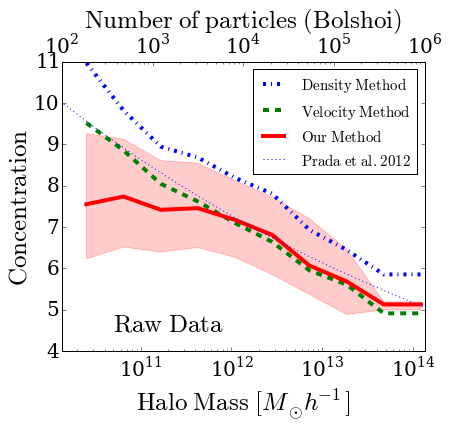

In [12]:
fig = plt.figure(figsize=(6.5,6.0))
ax = plt.axes()

enlarge_labels(ax,20)

estilos = ['-.', '--', '-']
colores = ['blue', 'green', 'red']
origen = ['$\mathrm{Density\ Method}$','$\mathrm{Velocity\ Method}$','$\mathrm{Our\ Method}$']
for i in range(3):
    ax.plot(10**mid_log_mass_interval,conc_median[:,i],colores[i],lw=4,linestyle=estilos[i], label=origen[i])

ax.fill_between(10**mid_log_mass_interval,conc_down[:,2], conc_up[:,2], color=colores[2], alpha=0.2)

#for i in range(3):

#ax.plot(10**mid_log_mass_interval_MD,conc_median_MD[:,2],'blue',lw=4,linestyle=estilos[2])
#ax.fill_between(10**mid_log_mass_interval_MD,conc_down_MD[:,2], conc_up_MD[:,2], color='blue', alpha=0.2)
    
#datos de prada
log_mass_range = np.linspace(9.0, 15.0, 100)
conc_theory = 7.28 * (10**log_mass_range/(1.0E12))**-0.074
ax.plot(10**log_mass_range, conc_theory,label='$\mathrm{Prada\ et\ al.\ 2012}$', linestyle=':')

#fit
z = np.polyfit((mid_log_mass_interval[3:] - 12.0), np.log10(conc_median[3:,2]), 1)
print "z", 10**z[1], z[0]

#datos del fit
# log_mass_range = np.linspace(10.0, 15.0, 100)
# conc_theory = 10**z[1]*(10**log_mass_range/(1E12))**z[0]
# ax.plot(10**log_mass_range, conc_theory,label='$\mathrm{nuestro}$')

min_part = 1E2
max_part = 1E6
ax.legend(loc=1, borderaxespad=0.5, prop={'size':15})
plt.xlim([min_part*bolshoi_particle_mass,max_part*bolshoi_particle_mass])
#ax.plot(mid_log_mass_interval-np.log10(particle_mass),conc_median[:,0], lw=0)
ax.set_ylim([4,10.0])
#ax.set_yscale('log')

ax2 = ax.twiny()
enlarge_labels(ax2,20)

plt.subplots_adjust(bottom=0.18, top=0.85)
ax2.set_xscale('log')
ax2.set_xlim([min_part,max_part])
ax2.set_ylim([4,11.0])

ax2.set_xlabel('$\mathrm{Number\ of\ particles\ (Bolshoi)}$',fontsize=25)
ax.set_xscale('log')
ax.set_xlabel('$\mathrm{Halo\ Mass}\ [M_{\odot} h^{-1}]$',fontsize=25)
ax.set_ylabel('$\mathrm{Concentration}$',fontsize=25)
ax.text(5E10, 4.5, r'$\mathrm{Raw\ Data}$', fontsize=25)
plt.savefig('../paper/concentration_bolshoi.pdf', bbox_inches='tight')


[ 0.18968382  0.0871647   0.04348727  0.02318776  0.01306133  0.00770407
  0.0047259   0.00299863  0.00195946  0.00131394]
[-0.01732142 -0.00980604 -0.00589568 -0.00372136 -0.00244517 -0.0016617
 -0.00116214 -0.00083311 -0.00061023 -0.00045551]
z 6.77855704579 -0.0552733316139


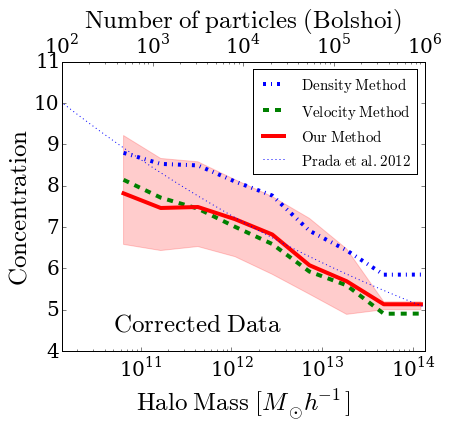

In [13]:
fig = plt.figure(figsize=(6.5,6.0))
ax = plt.axes()

enlarge_labels(ax,20)

estilos = ['-.', '--', '-']
colores = ['blue', 'green', 'red']
origen = ['$\mathrm{Density\ Method}$','$\mathrm{Velocity\ Method}$','$\mathrm{Our\ Method}$']

min_i = 1
mid_log_n_particle = mid_log_mass_interval - np.log10(bolshoi_particle_mass)
#density
i=0
f_off = func(mid_log_n_particle, popt_dens[0], popt_dens[1])
ax.plot(10**mid_log_mass_interval[min_i:],conc_median[min_i:,i]/(1.0+f_off[min_i:]),colores[i],lw=4,linestyle=estilos[i], label=origen[i])

#velocity
i=1
f_off = func(mid_log_n_particle, popt_vel[0], popt_vel[1])
ax.plot(10**mid_log_mass_interval[min_i:],conc_median[min_i:,i]/(1.0+f_off[min_i:]),colores[i],lw=4,linestyle=estilos[i], label=origen[i])
print f_off

#mass
i=2
f_off = func(mid_log_n_particle, popt_mass[0], popt_mass[1])
ax.plot(10**mid_log_mass_interval[min_i:],conc_median[min_i:,i]/(1.0+f_off[min_i:]),colores[i],lw=4,linestyle=estilos[i], label=origen[i])
ax.fill_between(10**mid_log_mass_interval[min_i:],conc_down[min_i:,2]/(1.0+f_off[min_i:]), 
                conc_up[min_i:,2]/(1.0+f_off[min_i:]), color=colores[2], alpha=0.2)

print f_off

    
#datos de prada
log_mass_range = np.linspace(9.0, 15.0, 100)
conc_theory = 7.28 * (10**log_mass_range/(1.0E12))**-0.074
ax.plot(10**log_mass_range, conc_theory,label='$\mathrm{Prada\ et\ al.\ 2012}$', linestyle=':')

#fit
z = np.polyfit((mid_log_mass_interval[:] - 12.0), np.log10(conc_median[:,2]/(1+f_off)), 1)
print "z", 10**z[1], z[0]

#datos del fit
# log_mass_range = np.linspace(10.0, 15.0, 100)
# conc_theory = 10**z[1]*(10**log_mass_range/(1E12))**z[0]
# ax.plot(10**log_mass_range, conc_theory,label='$\mathrm{nuestro}$')

min_part = 1E2
max_part = 1E6
ax.legend(loc=1, borderaxespad=0.5, prop={'size':15})
plt.xlim([min_part*bolshoi_particle_mass,max_part*bolshoi_particle_mass])
#ax.plot(mid_log_mass_interval-np.log10(particle_mass),conc_median[:,0], lw=0)
ax.set_ylim([4,11.0])
#ax.set_yscale('log')

ax2 = ax.twiny()
enlarge_labels(ax2,20)

plt.subplots_adjust(bottom=0.18, top=0.85)
ax2.set_xscale('log')
ax2.set_xlim([min_part,max_part])
ax2.set_ylim([4,11.0])

ax2.set_xlabel('$\mathrm{Number\ of\ particles\ (Bolshoi)}$',fontsize=25)
ax.set_xscale('log')
ax.set_xlabel('$\mathrm{Halo\ Mass}\ [M_{\odot} h^{-1}]$',fontsize=25)
ax.set_ylabel('$\mathrm{Concentration}$',fontsize=25)

ax.text(5E10, 4.5, r'$\mathrm{Corrected\ Data}$', fontsize=25)
plt.savefig('../paper/concentration_bolshoi_corrected.pdf', bbox_inches='tight')